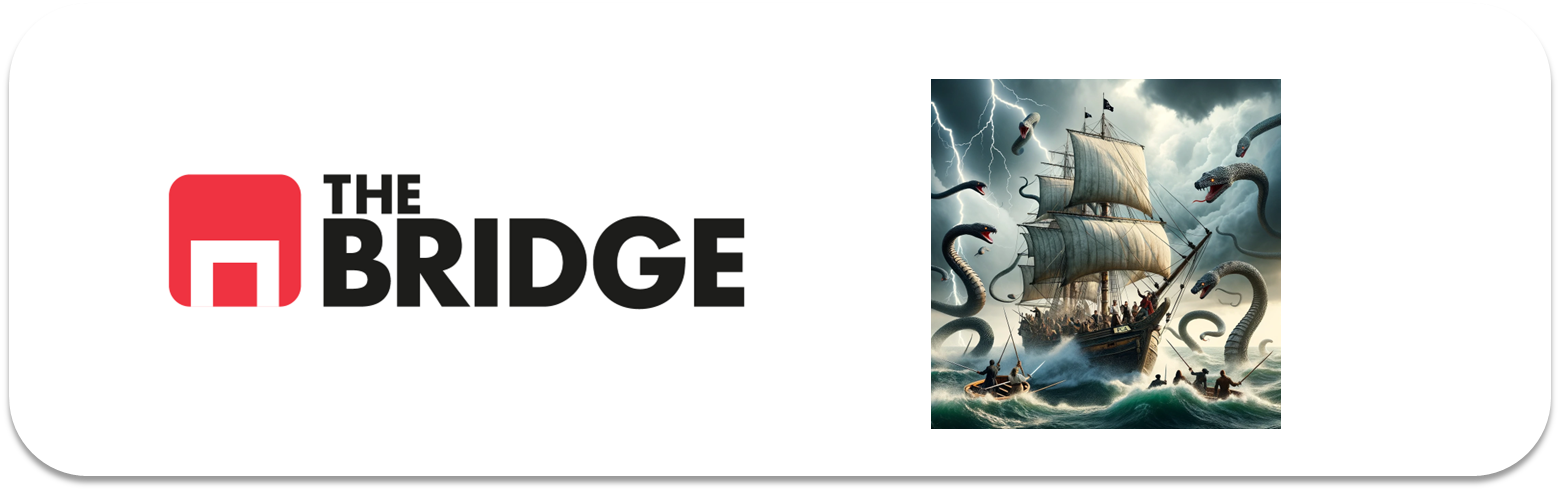

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [4]:
import pandas as pd

data_path = "data/credit_npo.csv"  # Asegúrate de que esta ruta es correcta
df = pd.read_csv(data_path)
df.head(20)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [6]:
# Eliminar las filas que contienen valores nulos en cualquier columna
df.dropna(subset=['MonthlyIncome', 'NumberOfDependents'], inplace=True)

# Verificar que no hay valores nulos en el DataFrame
print(df.isnull().sum())


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [7]:
# Convertir las columnas 'NumberOf...' a categóricas con 2 o 3 niveles
for col in df.columns:
    if 'NumberOf' in col:
        df[col] = pd.cut(df[col], bins=[-1, 0, 1, float('inf')], labels=[0, 1, 2])

# Verificar las conversiones mostrando las primeras filas del DataFrame
print(df.head())


   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 0                              0.081892   37   
1                 0                              0.023413   74   
2                 0                              0.000000   43   
3                 0                              0.492754   44   
4                 0                              1.000000   63   

  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                    0   0.070709         5656.0   
1                                    0   0.209197         4870.0   
2                                    0   0.080784         5000.0   
3                                    0   0.412735         7333.0   
4                                    0   0.000000         8333.0   

  NumberOfOpenCreditLinesAndLoans NumberOfTimes90DaysLate  \
0                               2                       1   
1                               2                       0   
2          

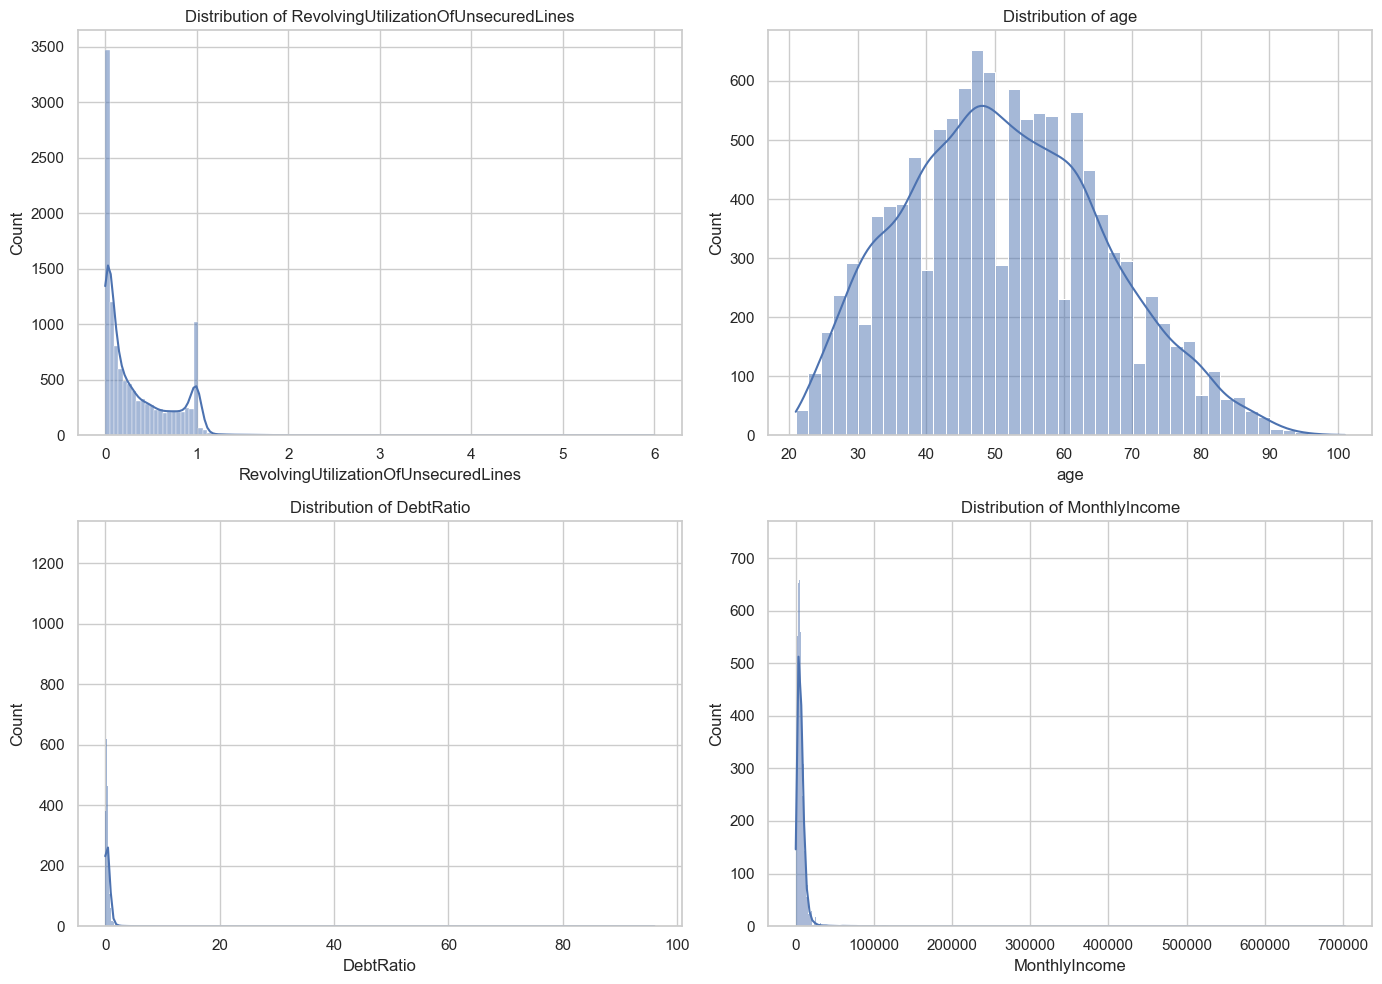

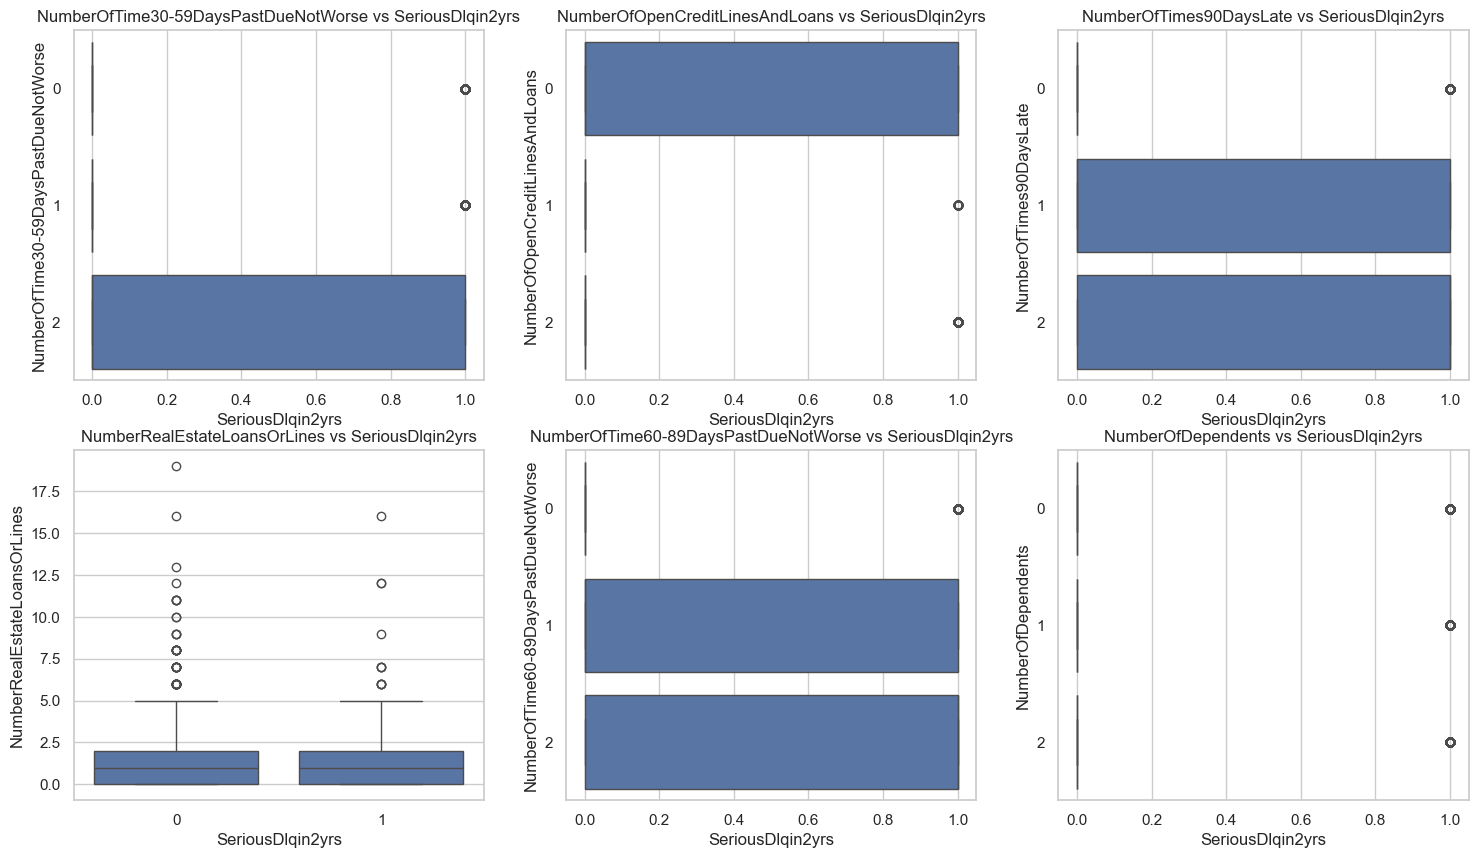

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")

# Histograma de las características numéricas
num_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Boxplot de las características categóricas
cat_features = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans',
                'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(cat_features):
    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs SeriousDlqin2yrs')



Análisis Visual y Filtrado por Correlación y Covarianza
Análisis de correlación:

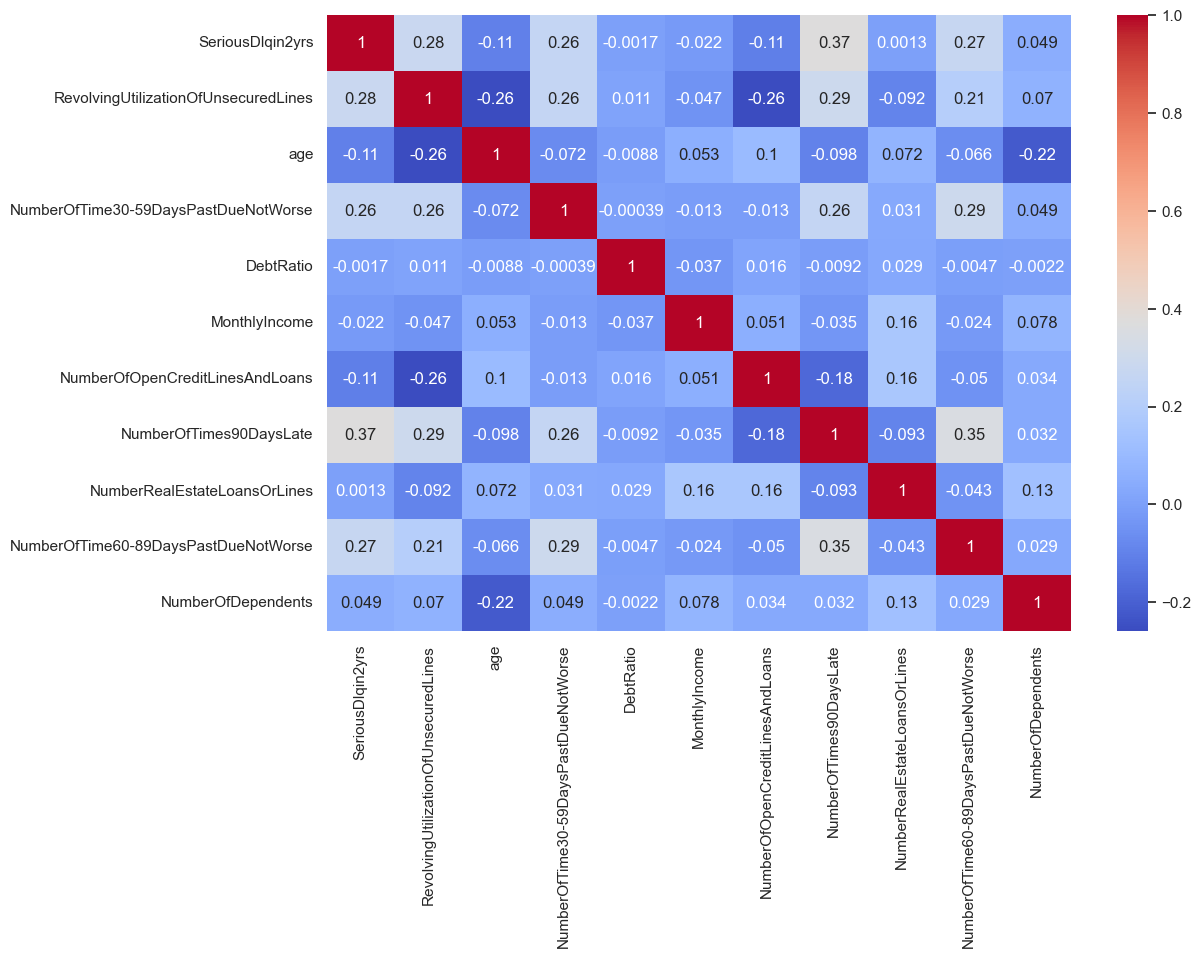

['SeriousDlqin2yrs', 'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'age']


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Filtrado por correlación
corr_target = corr_matrix["SeriousDlqin2yrs"].abs().sort_values(ascending=False)
high_corr_features = corr_target[corr_target > 0.1].index.tolist()
print(high_corr_features)



Filtrado por covarianza:
Vamos a eliminar las features que tengan alta covarianza entre sí.

In [11]:
from sklearn.feature_selection import VarianceThreshold

# Filtrado por varianza
selector = VarianceThreshold(threshold=0.1)
selector.fit(df[high_corr_features])
low_variance_features = df[high_corr_features].columns[selector.get_support()]
print(low_variance_features)


Index(['NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')


SelectKBest y ANOVA para features numéricas:

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(X, y)
anova_features = X.columns[selector.get_support()]
print(anova_features)


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')


Mutual Information para features categóricas:

In [13]:
from sklearn.feature_selection import mutual_info_classif

categorical_features = [col for col in X.columns if df[col].dtype == 'category']
selector = SelectKBest(score_func=mutual_info_classif, k=6)
selector.fit(X[categorical_features], y)
mi_features = X[categorical_features].columns[selector.get_support()]
print(mi_features)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=5. All the features will be returned.
  warnings.warn(


Index(['NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')


Selección de Features con Modelo Intermedio (SelectFromModel)
Entrenar un modelo intermedio:

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

selector = SelectFromModel(estimator=model, max_features=6)
selector.fit(X, y)
model_features = X.columns[selector.get_support()]
print(model_features)


Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


Selección de Features con RFE
Aplicar RFE

In [15]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(X, y)
rfe_features = X.columns[rfe.get_support()]
print(rfe_features)


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfTimes90DaysLate'],
      dtype='object')


Selección de Features con SFS
Aplicar SFS

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(model, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)
sfs = sfs.fit(X, y)
sfs_features = list(sfs.k_feature_names_)
print(sfs_features)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


 Selección de Features mediante Hard-Voting
Combinar las selecciones anteriores

In [20]:
from collections import Counter

all_features = [anova_features, mi_features, model_features, rfe_features, sfs_features]
feature_counts = Counter([feature for sublist in all_features for feature in sublist])

# Seleccionar features con más votos
hard_voting_features = [feature for feature, count in feature_counts.items() if count >= 3]
print(hard_voting_features)


['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


Comparar y Entrenar Modelos
Selecciona tres modelos y realiza validación cruzada utilizando las listas de features seleccionadas.

Dividir los datos en entrenamiento y prueba:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

features_sets = [anova_features, mi_features, model_features, rfe_features, sfs_features, hard_voting_features]
results = {}

for model_name, model in models.items():
    results[model_name] = {}
    for i, features in enumerate(features_sets):
        scores = cross_val_score(model, X_train[features], y_train, cv=5, scoring='recall')
        results[model_name][f"Features_Set_{i+1}"] = scores.mean()

for model_name, model_results in results.items():
    print(f"Results for {model_name}:")
    for features_set, score in model_results.items():
        print(f"{features_set}: {score}")


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Results for LogisticRegression:
Features_Set_1: 0.18488755622188907
Features_Set_2: 0.17967016491754123
Features_Set_3: 0.19863568215892052
Features_Set_4: 0.20040479760119942
Features_Set_5: 0.1848425787106447
Features_Set_6: 0.18488755622188907
Results for SVC:
Features_Set_1: 0.0
Features_Set_2: 0.19685157421289354
Features_Set_3: 0.0
Features_Set_4: 0.0
Features_Set_5: 0.18815592203898052
Features_Set_6: 0.0
Results for GradientBoosting:
Features_Set_1: 0.19859070464767617
Features_Set_2: 0.19689655172413792
Features_Set_3: 0.19341829085457268
Features_Set_4: 0.19683658170914542
Features_Set_5: 0.18298350824587709
Features_Set_6: 0.19859070464767617


Optimización de Hiperparámetros

In [23]:
from sklearn.model_selection import GridSearchCV

best_model = GradientBoostingClassifier()
best_features = hard_voting_features  # O cualquier conjunto de features que haya obtenido el mejor resultado

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train[best_features], y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


Evaluar contra el conjunto de prueba:

In [24]:
best_model = grid_search.best_estimator_
best_model.fit(X_train[best_features], y_train)
y_pred = best_model.predict(X_test[best_features])

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3294
           1       0.36      0.18      0.24       251

    accuracy                           0.92      3545
   macro avg       0.65      0.58      0.60      3545
weighted avg       0.90      0.92      0.91      3545



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

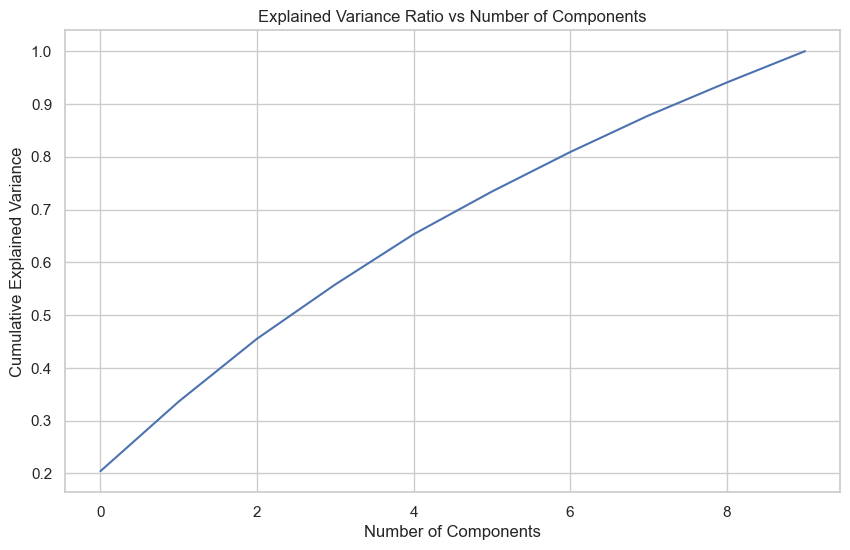

Number of components to explain at least 95% variance: 10
Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3294
           1       0.43      0.18      0.26       251

    accuracy                           0.92      3545
   macro avg       0.69      0.58      0.61      3545
weighted avg       0.90      0.92      0.91      3545



In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Paso 1: Ajustar PCA y seleccionar el número de componentes
pca = PCA()
scaler = StandardScaler()

# Aplicamos escalado de características y luego PCA
pca_pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

# Entrenar PCA en los datos de entrenamiento
pca_pipeline.fit(X_train)

# Graficar la varianza explicada acumulada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Determinar el número de componentes que explican al menos el 95% de la varianza
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components to explain at least 95% variance:", n_components)

# Paso 2: Transformar los datos originales en las componentes principales seleccionadas
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Paso 3: Entrenar el modelo ganador en el nuevo conjunto de datos transformado
best_model.fit(X_train_pca, y_train)

# Paso 4: Evaluar el modelo en el conjunto de prueba
y_pred_pca = best_model.predict(X_test_pca)

from sklearn.metrics import classification_report

print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))
